In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers
from keras.layers import Activation
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.layers import Flatten

In [36]:
# define the keras model
model = Sequential()

model.add(Flatten(input_shape=(224,224,1)))
# Layer 1
model.add(Dense(100, kernel_initializer='glorot_normal',activation='relu'))

# Layer 2
model.add(Dense(50,  kernel_initializer='glorot_normal',activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-2)))

#layer 3
model.add(Dense(20,kernel_initializer='glorot_normal',activation='relu',
                kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-2)))

#Adding Flatten Layer
model.add(Flatten())


# output Layer
model.add(Dense(1, kernel_initializer='glorot_normal', activation='sigmoid'))

#model summary
print(model.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 50176)             0         
                                                                 
 dense_40 (Dense)            (None, 100)               5017700   
                                                                 
 dense_41 (Dense)            (None, 50)                5050      
                                                                 
 dense_42 (Dense)            (None, 20)                1020      
                                                                 
 flatten_3 (Flatten)         (None, 20)                0         
                                                                 
 dense_43 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5,023,791
Trainable params: 5,023,791
N

In [37]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0002)

#compiling the cnn
model.compile(optimizer=opt , loss='binary_crossentropy',metrics=['accuracy'])

#part2- fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory("/home/bkn/Dataset/Dog_Cat_Dataset/training",
        target_size=(224,224),
        batch_size=16,
        shuffle = True,
        color_mode="grayscale",
        class_mode='binary')

print("training_set.class_indices:   ",training_set.class_indices)

test_set = test_datagen.flow_from_directory("/home/bkn/Dataset/Dog_Cat_Dataset/test",
        target_size=(224,224),
        batch_size=8,
        shuffle = False,                               
        color_mode="grayscale",
        class_mode='binary')

print("test_set.class_indices:   ",test_set.class_indices)

Found 1700 images belonging to 2 classes.
training_set.class_indices:    {'cats': 0, 'dogs': 1}
Found 300 images belonging to 2 classes.
test_set.class_indices:    {'cats': 0, 'dogs': 1}


In [38]:
History=model.fit(training_set,
                  steps_per_epoch=107,
                  epochs=50,
                  validation_data=test_set,
                  validation_steps=38,
                  verbose=1)

Epoch 1/50


2023-07-09 21:45:06.764046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


107/107 [==============================] - ETA: 0s - loss: 1.7086 - accuracy: 0.5129

2023-07-09 21:45:17.490234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


107/107 [==============================] - 12s 103ms/step - loss: 1.7086 - accuracy: 0.5129 - val_loss: 1.5403 - val_accuracy: 0.5000
Epoch 2/50
107/107 [==============================] - 9s 88ms/step - loss: 1.4911 - accuracy: 0.5318 - val_loss: 1.4015 - val_accuracy: 0.5300
Epoch 3/50
107/107 [==============================] - 10s 89ms/step - loss: 1.3677 - accuracy: 0.5394 - val_loss: 1.2848 - val_accuracy: 0.5467
Epoch 4/50
107/107 [==============================] - 10s 95ms/step - loss: 1.2633 - accuracy: 0.5376 - val_loss: 1.2005 - val_accuracy: 0.5100
Epoch 5/50
107/107 [==============================] - 11s 100ms/step - loss: 1.1690 - accuracy: 0.5459 - val_loss: 1.1195 - val_accuracy: 0.5467
Epoch 6/50
107/107 [==============================] - 11s 106ms/step - loss: 1.1047 - accuracy: 0.5671 - val_loss: 1.2192 - val_accuracy: 0.5000
Epoch 7/50
107/107 [==============================] - 11s 104ms/step - loss: 1.0800 - accuracy: 0.5400 - val_loss: 1.0164 - val_accuracy: 0.5567


In [40]:
History.params

{'verbose': 1, 'epochs': 50, 'steps': 107}

In [41]:
# list all data in history
print(History.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


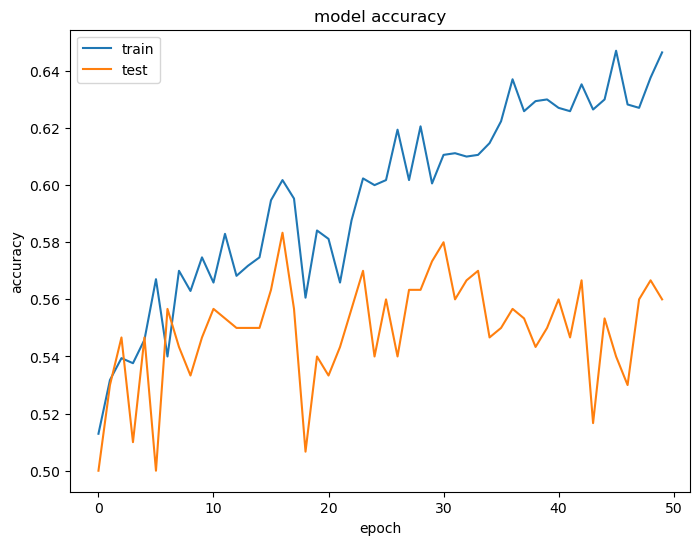

In [43]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

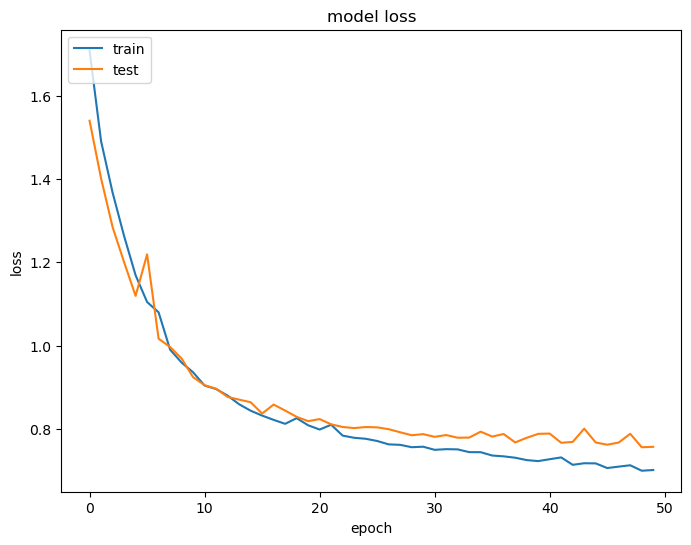

In [44]:
# summarize history for loss
plt.figure(figsize=(8,6))
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [46]:
# calculate model's accuracy on test set with use of keras .evaluate_generator() function.
score = model.evaluate(test_set)
print("Test Accuracy: ",score[1]*100)

 7/38 [====>.........................] - ETA: 0s - loss: 0.8142 - accuracy: 0.4107

2023-07-09 22:00:53.594909: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 1s 16ms/step - loss: 0.7568 - accuracy: 0.5600
Test Accuracy:  56.00000023841858


In [48]:
# calculate model's accuracy on training set with use of keras .evaluate_generator() function.
score = model.evaluate(training_set)
print("Training Accuracy: ",score[1]*100)

  2/107 [..............................] - ETA: 6s - loss: 0.5553 - accuracy: 0.8125 

2023-07-09 22:01:25.193262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


107/107 [==============================] - 8s 76ms/step - loss: 0.6917 - accuracy: 0.6547
Training Accuracy:  65.47058820724487


In [50]:
preds = model.predict(test_set)
y_preds = np.where(preds >=0.5, 1, 0)

 3/38 [=>............................] - ETA: 1s

2023-07-09 22:02:03.072578: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


38/38 [==============================] - 1s 16ms/step


In [51]:
cfm = confusion_matrix(test_set.classes, y_preds)
print(cfm)

[[ 64  86]
 [ 46 104]]


In [52]:
target_names=['cats','dogs']
print(classification_report(test_set.classes, y_preds,target_names=target_names))

              precision    recall  f1-score   support

        cats       0.58      0.43      0.49       150
        dogs       0.55      0.69      0.61       150

    accuracy                           0.56       300
   macro avg       0.56      0.56      0.55       300
weighted avg       0.56      0.56      0.55       300



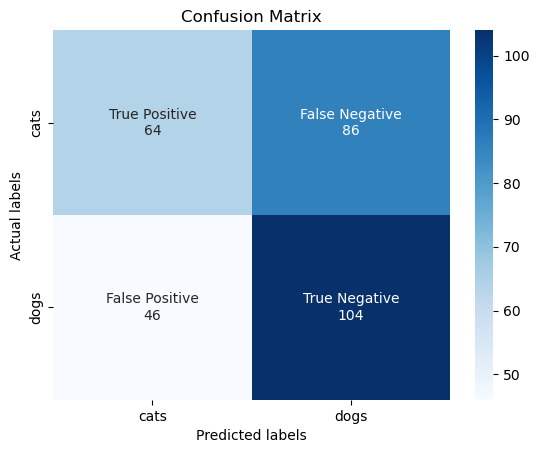

In [53]:
group_names = ["True Positive","False Negative","False Positive","True Negative"]
group_counts = ['{0:0.0f}'.format(value) for value in cfm.flatten()]

labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)

ax= plt.subplot()
sns.heatmap(cfm, annot=labels, fmt='', cmap='Blues', ax = ax)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('Actual labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['cats', 'dogs'])
ax.yaxis.set_ticklabels(['cats', 'dogs'])
plt.show()

In [60]:
from keras.utils import load_img, img_to_array
test_image=load_img('images/dog1.png',target_size=(224,224),color_mode='grayscale')
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.round(result))
if result[0] >= 0.5:
    print("According to our model's prediction below image is of a Dog")
else:
    print("According to our model's prediction below image is of a Cat")

1/1 [==============================] - 0s 69ms/step
[[1.]]
According to our model's prediction below image is of a Dog


In [61]:
test_image=load_img('images/cats/cat_0018.jpg',target_size=(224,224),color_mode='grayscale')
test_image=img_to_array(test_image)

test_image=np.expand_dims(test_image,axis=0)
result=model.predict(test_image)
print(np.round(result))
if result[0] >= 0.5:
    print("According to our model's prediction below image is of a Dog")
else:
    print("According to our model's prediction below image is of a Cat")

1/1 [==============================] - 0s 27ms/step
[[0.]]
According to our model's prediction below image is of a Cat
